In [ ]:
pip install tensorflow==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 83.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 95.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 10.5 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.15.0
    Uninstalling wrapt-1.15.0:
      Successfully uninstalled wrapt-1.15.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.13.0
    Uninstalling tensorflow-estimator-2.13.0:
      Successfully uninstalled tensorflow-estimator-2.13.0
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.

In [ ]:
# libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator
import time

#Visualizers
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
import matplotlib.pyplot as plt

#Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import log_loss
from sklearn.metrics import zero_one_loss
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import classification_report

#Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier

#Neural Network
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Lambda, Layer, ReLU
from keras.models import load_model
import tensorflow as tf
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D,Concatenate

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path6 = '/content/drive/MyDrive/AlzheimerCodesDatosPlanos/BasesDeDatos/ADNI/ADNIMERGE.csv'
figures_path = './figures'

In [ ]:
Data = pd.read_csv(data_path6)

In [ ]:
df=Data[["AGE","PTGENDER","PTEDUCAT", "PTMARRY","APOE4",
        "ADAS11","ADAS13","ADASQ4","MMSE","FAQ", "MOCA",
        "CDRSB","RAVLT_immediate","RAVLT_learning","RAVLT_forgetting",
        "RAVLT_perc_forgetting","LDELTOTAL", "TRABSCOR","mPACCdigit"
        ,"mPACCtrailsB","Ventricles", "Hippocampus","WholeBrain", "Entorhinal",
        "Fusiform", "MidTemp", "ICV","DX_bl"]]

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
LabelEncoder_1=LabelEncoder()
df["PTGENDER"]=LabelEncoder_1.fit_transform(df["PTGENDER"])
LabelEncoder_1=LabelEncoder()
df["PTMARRY"]=LabelEncoder_1.fit_transform(df["PTMARRY"])

In [ ]:
df=df.dropna()

In [ ]:
df.drop(df[df['DX_bl']=="SMC"].index,inplace=True)
df.drop(df[df['DX_bl']=="LMCI"].index,inplace=True)
df.drop(df[df['DX_bl']=="AD"].index,inplace=True)

In [ ]:
Labels = df['DX_bl'].values
Features = df.drop(['DX_bl'],axis=1).values


print('Features shape:', Features.shape)
print('Labels shape:', Labels.shape)

Features shape: (1279, 27)
Labels shape: (1279,)


In [ ]:
for i in range(len(Labels)):
  if Labels[i]=="EMCI":
    Labels[i]=0
  if Labels[i]=="CN":
    Labels[i]=1

In [ ]:
#Write function for class-centric metrics
# Classification report
def CR_viz():
    def Class_report(model,classes):
        visualizer = ClassificationReport(model, classes=classes, support=True)
        train_start_time = time.time()
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        print(f'Train runtime: {time.time()-train_start_time}')
        test_start_time = time.time()
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        print(f'Test runtime: {time.time()-test_start_time}')
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        Class_report(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_CR.pdf")

#Class Prediction Error
def CPE_viz():
    def CPE(model,classes):
        visualizer = ClassPredictionError(model, classes=classes)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        CPE(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_CPE.pdf")

#Confusion matrix
def CM_viz():
    def CM(model,classes):
        visualizer = ConfusionMatrix(model, classes=classes, percent=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        CM(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_CM.pdf")

#ROC-AUC
def ROC_viz():
    def ROC(model,classes):
        visualizer = ROCAUC(model, classes=classes)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        ROC(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_ROC.pdf")

#Precision Recall Curve
def PRC_viz():
    def PRC(model,classes):
        visualizer = PrecisionRecallCurve(model,classes=classes, per_class=True, iso_f1_curves=False,
    fill_area=False, micro=False)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        PRC(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_PRC.pdf")

In [ ]:
# Write function for aggregate metrics
def classifier_metrics():
    def metrics(model):
        #     model=model_name()
        model.fit(X_train, y_train)  # Fit the visualizer and the model
        y_pred = model.predict(X_test)
        try:
            y_prob = model.predict_proba(X_test)
            log_metric = log_loss(y_test,y_prob)
        except:
            y_prob = "Not probablistic"
            log_metric = 0
        else:
            y_pred = model.predict(X_test)

        acc_score=accuracy_score(y_test,y_pred)
        clc=classification_report(y_test, y_pred,labels=[1, 2, 3],digits=4)

        print(clc)
        print('accuracy_score: {0:.4f}'.format(acc_score))
    for name in classifiers:
        print (str(name))
        metrics(name)
        print()
        print ("---------------------------------------------------------------------------------")

In [ ]:
from sklearn.utils.multiclass import type_of_target

Labels= Labels[:].astype(int)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Features, Labels, test_size=0.2, stratify=Labels, random_state=42)

print('Train data shape:', X_train.shape)
print('Train labels shape:', y_train.shape)
print('Test data shape:', X_test.shape)
print('Test labels shape:', y_test.shape)

Train data shape: (1023, 27)
Train labels shape: (1023,)
Test data shape: (256, 27)
Test labels shape: (256,)


In [ ]:
scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#classes
classes = [0, 1]

In [ ]:
# select classifiers
classifiers=[
DecisionTreeClassifier(criterion= 'gini',max_depth= 5, min_samples_leaf= 1, min_samples_split=5),
MLPClassifier(activation='relu', hidden_layer_sizes=(100, 50), learning_rate= 'constant', solver= 'adam'),
KNeighborsClassifier(algorithm='auto', leaf_size= 1, n_neighbors= 1, p= 1, weights= 'uniform'),
SGDClassifier(alpha=0.01, loss= 'log', max_iter=3000, penalty='l1'),
ExtraTreesClassifier(max_depth=20,n_estimators=200,min_samples_split=2, random_state=50),
svm.SVC(C=10, gamma= 'scale', kernel= 'rbf'),
RandomForestClassifier(max_depth= None, min_samples_split= 4, n_estimators=300, random_state=30),
GradientBoostingClassifier(learning_rate= 0.1, max_depth=7, n_estimators=200, random_state= 50),
]

names=['ET', 'SVM', 'RF','GB','DCT', 'MLP', 'KN','SGD']

Train runtime: 0.028322458267211914
Test runtime: 0.11726117134094238


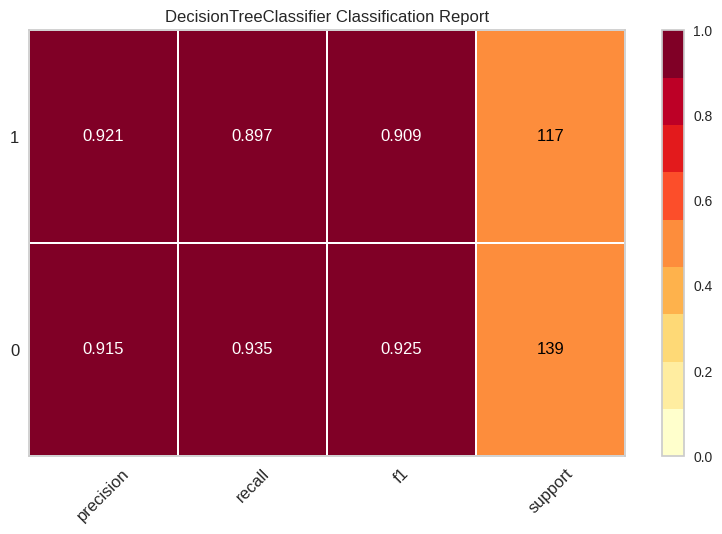

Train runtime: 5.372167348861694
Test runtime: 0.10385918617248535


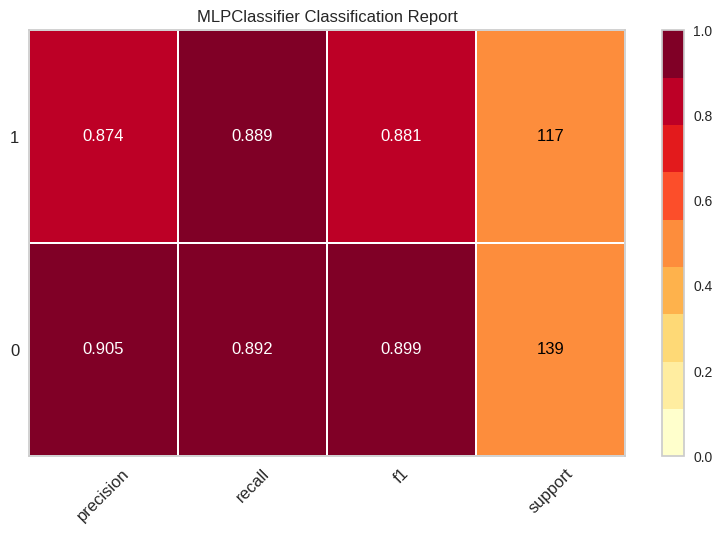

Train runtime: 0.0012400150299072266
Test runtime: 0.46372127532958984


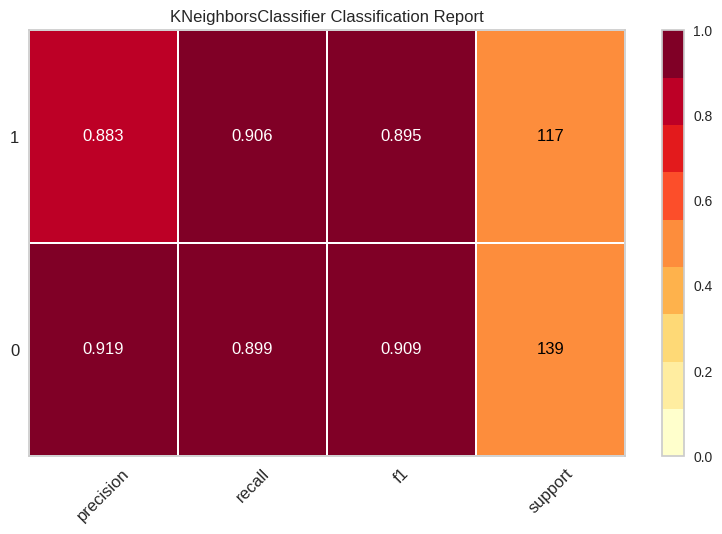

Train runtime: 0.02007126808166504
Test runtime: 0.04505586624145508


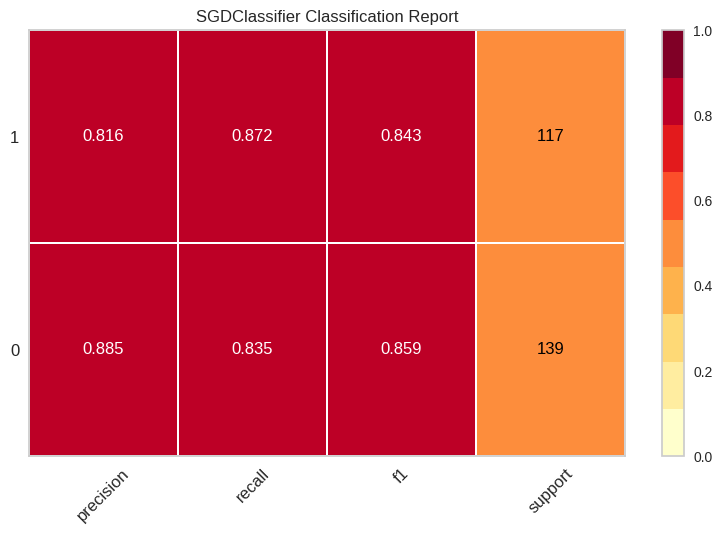

Train runtime: 0.8522071838378906
Test runtime: 0.11822271347045898


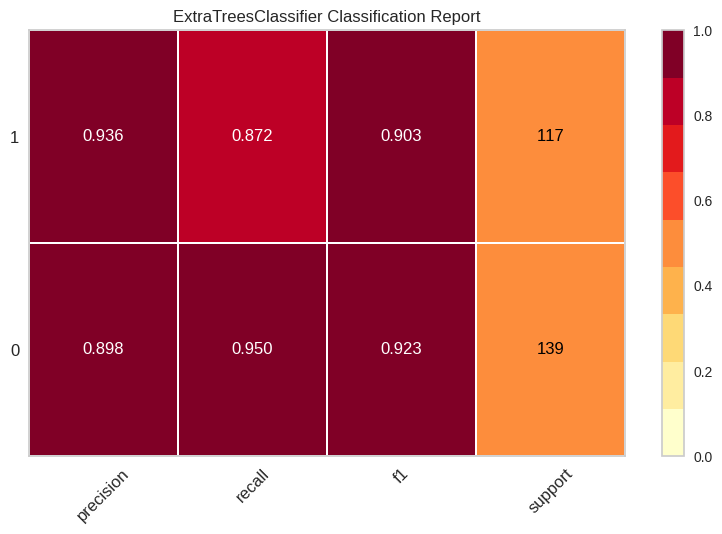

Train runtime: 0.10093283653259277
Test runtime: 0.1484816074371338


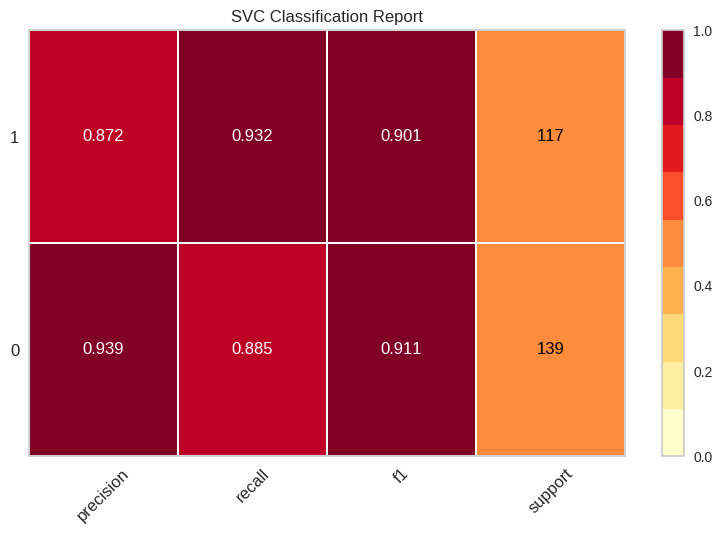

Train runtime: 3.9735310077667236
Test runtime: 0.31652212142944336


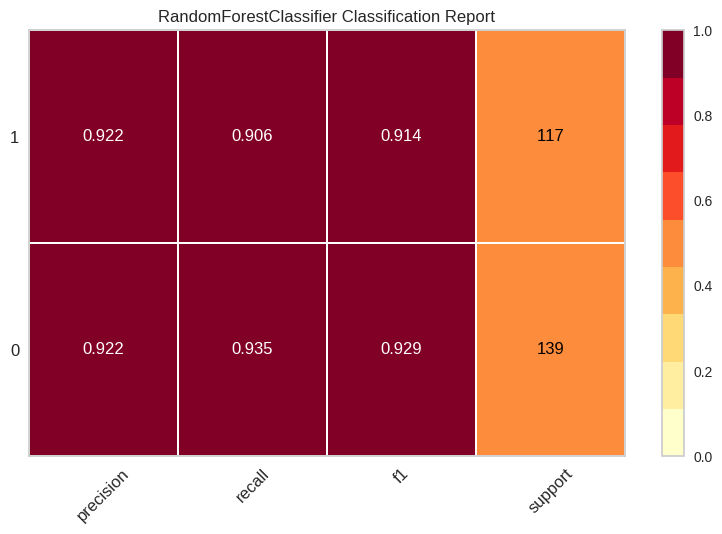

Train runtime: 10.263500928878784
Test runtime: 0.19994831085205078


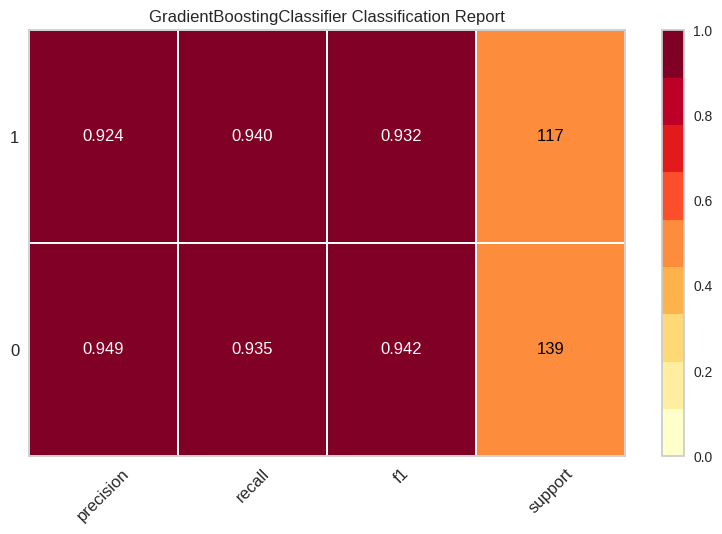

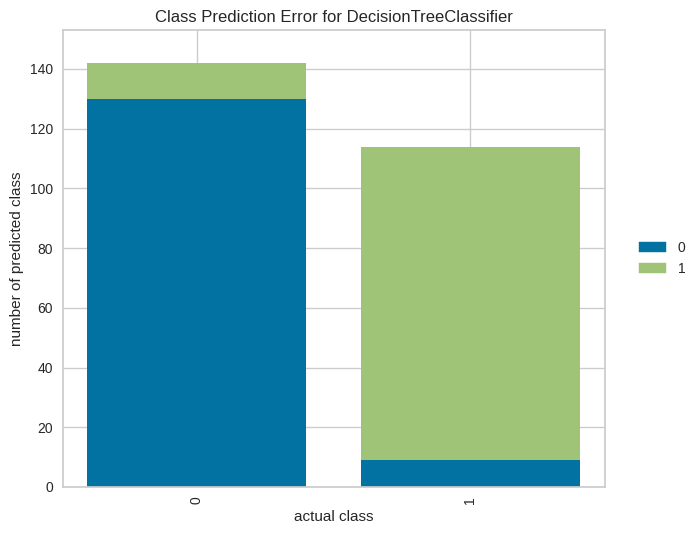

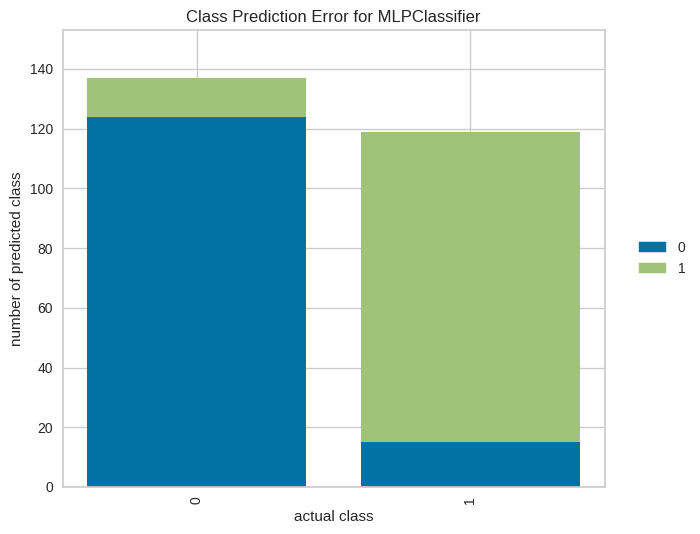

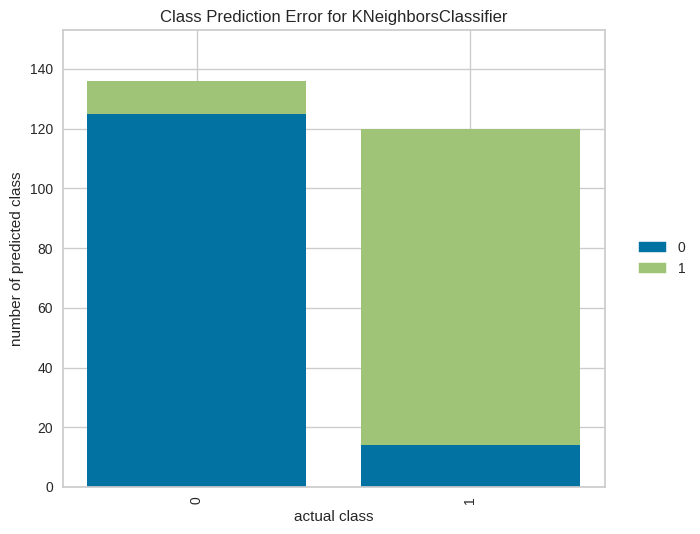

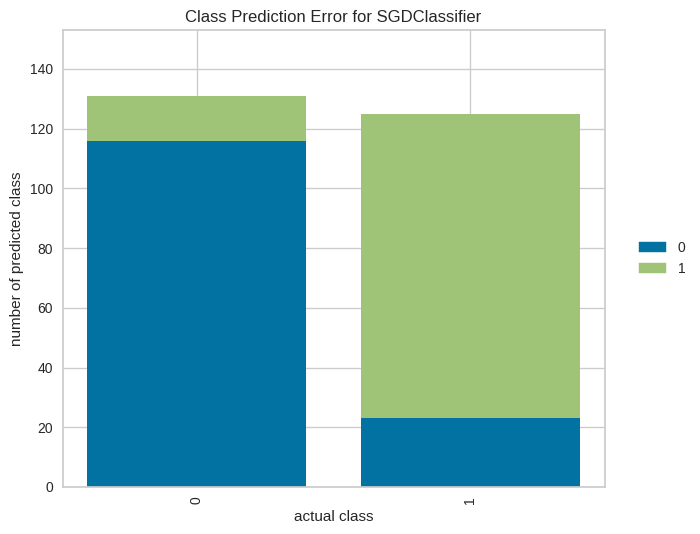

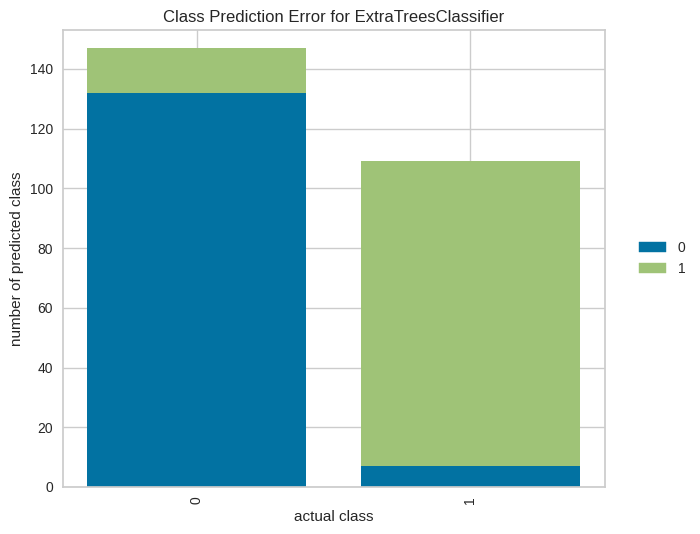

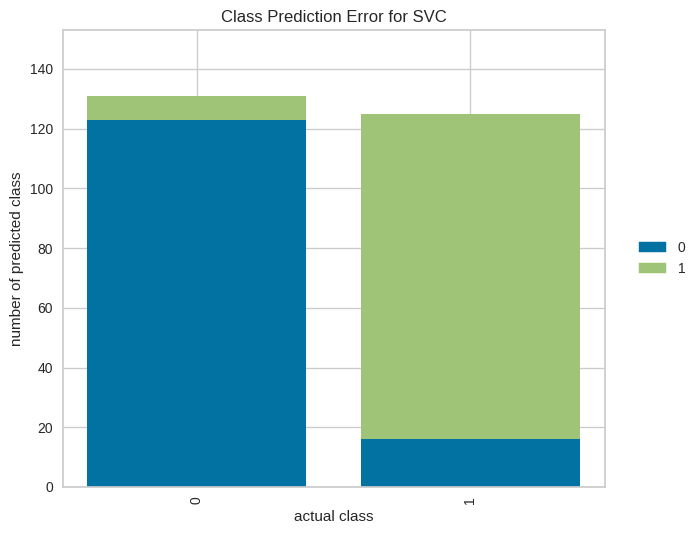

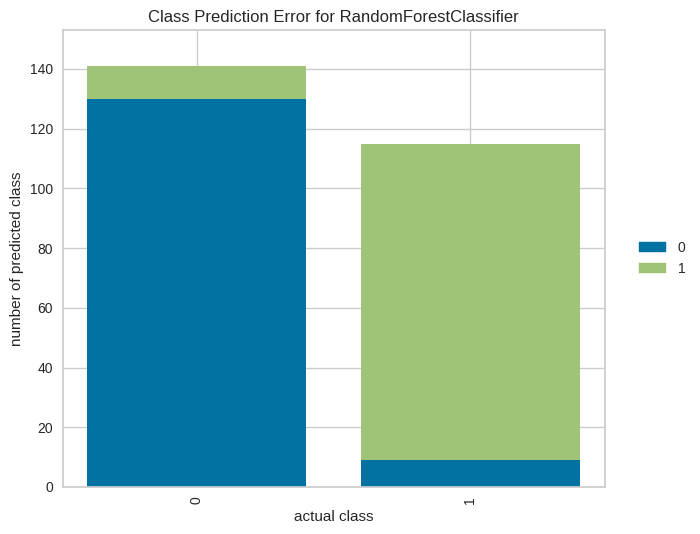

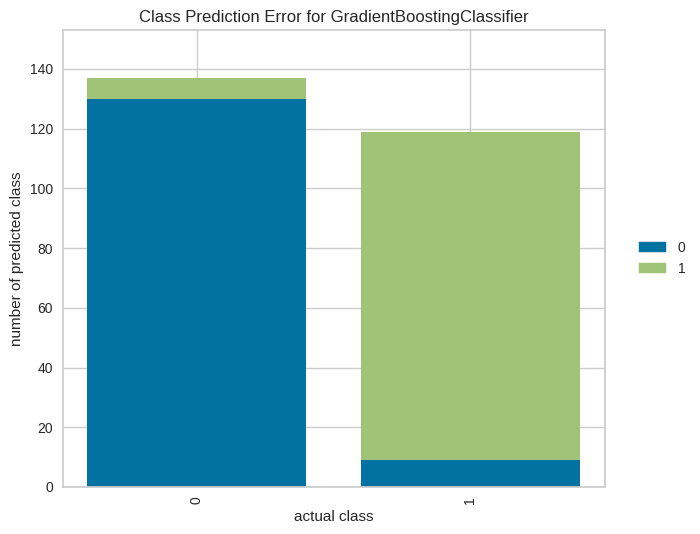

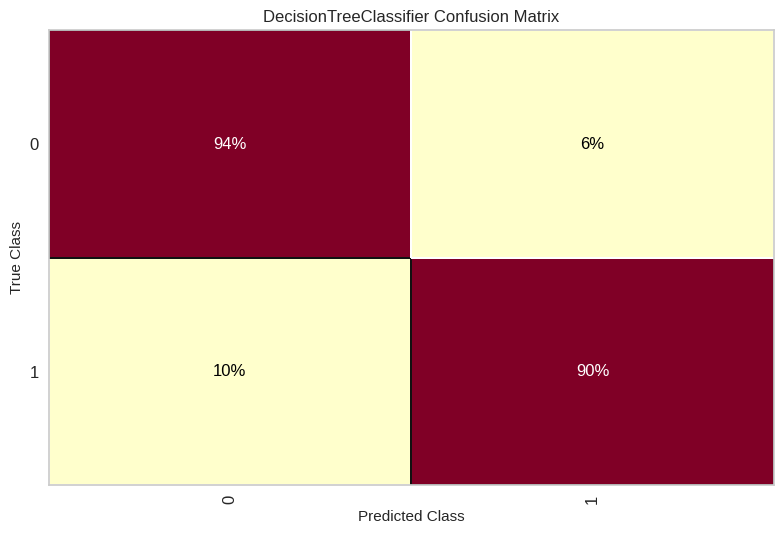

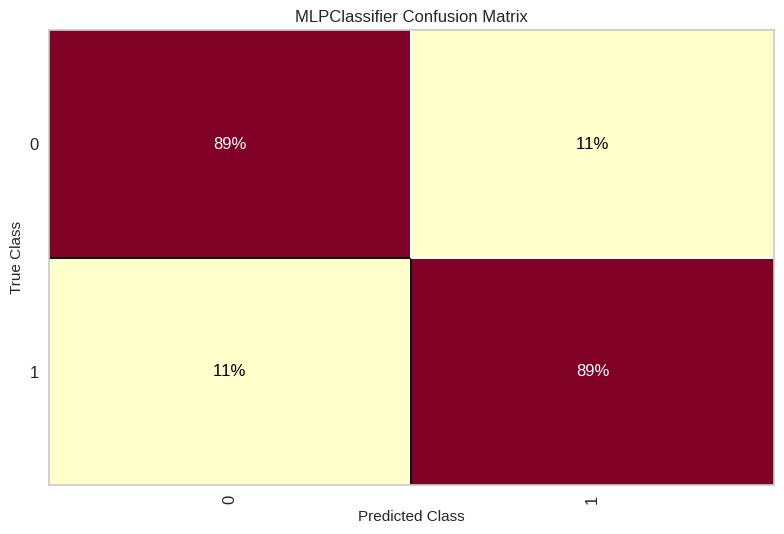

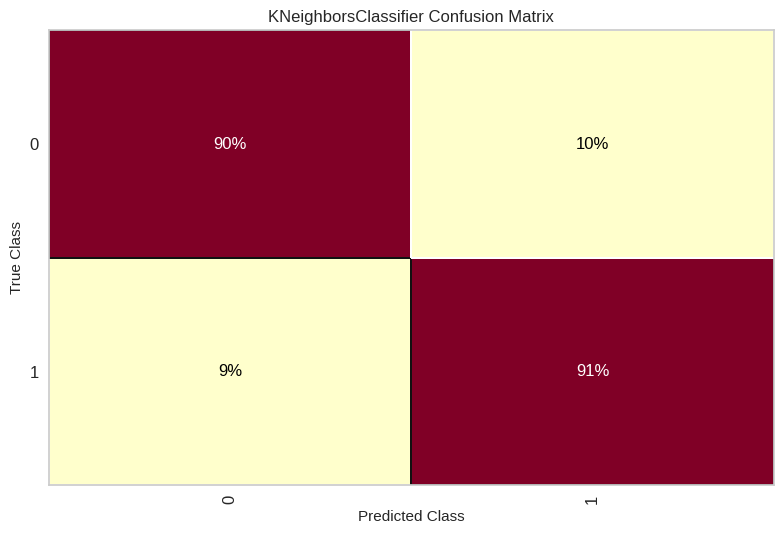

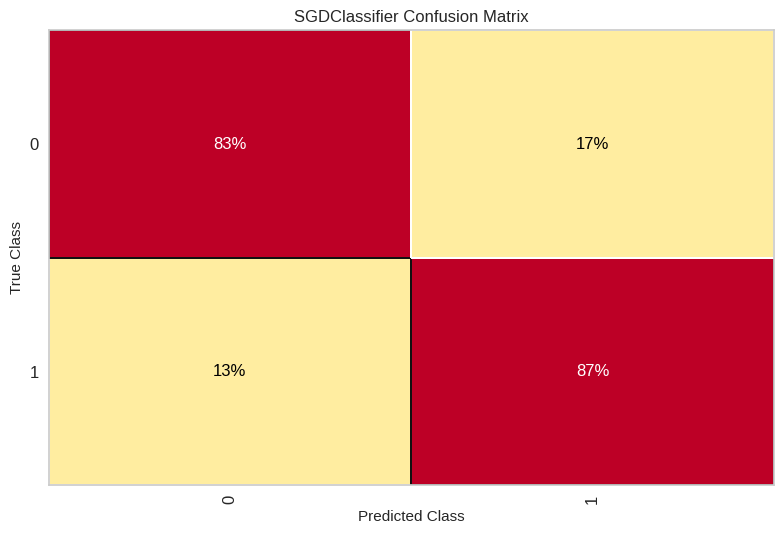

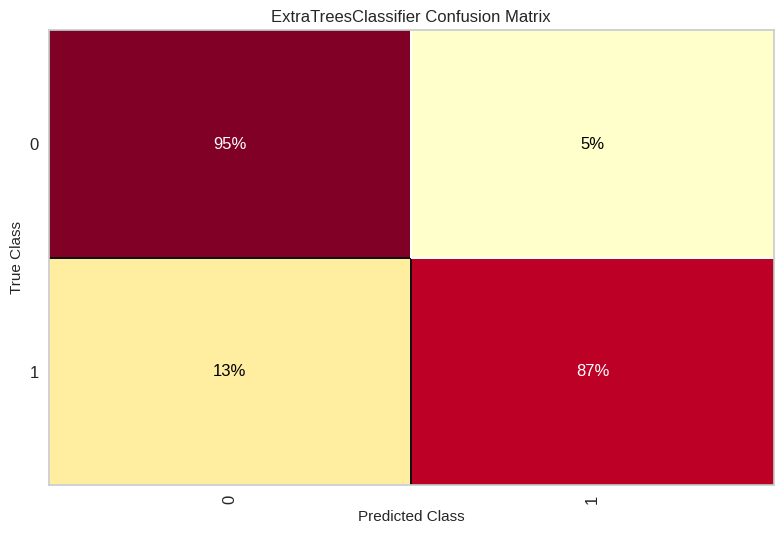

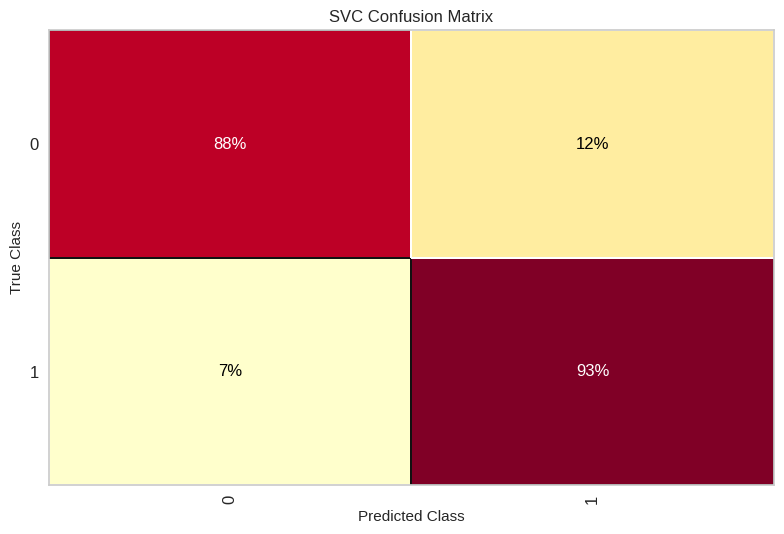

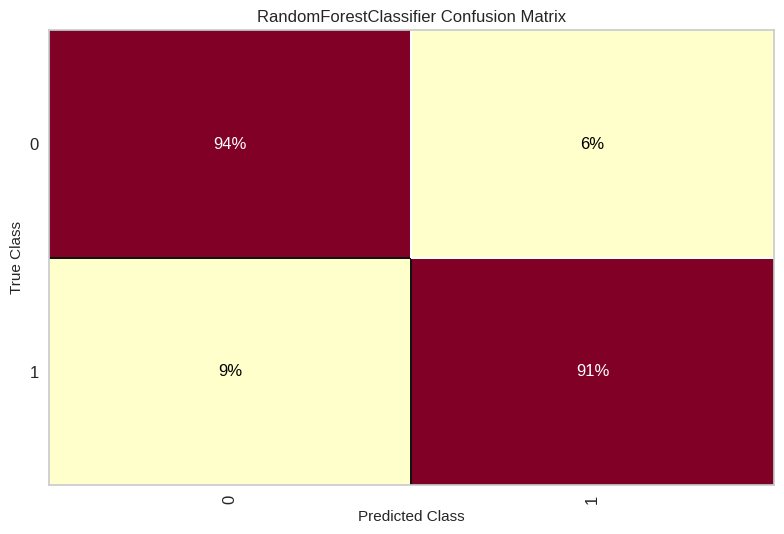

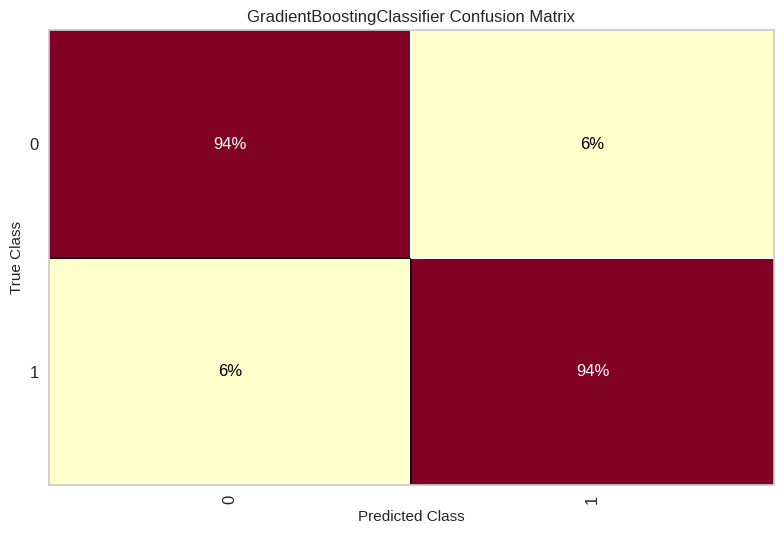

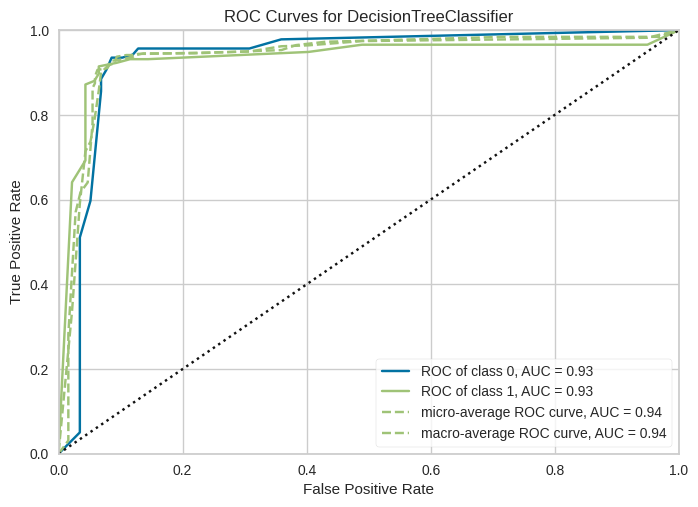

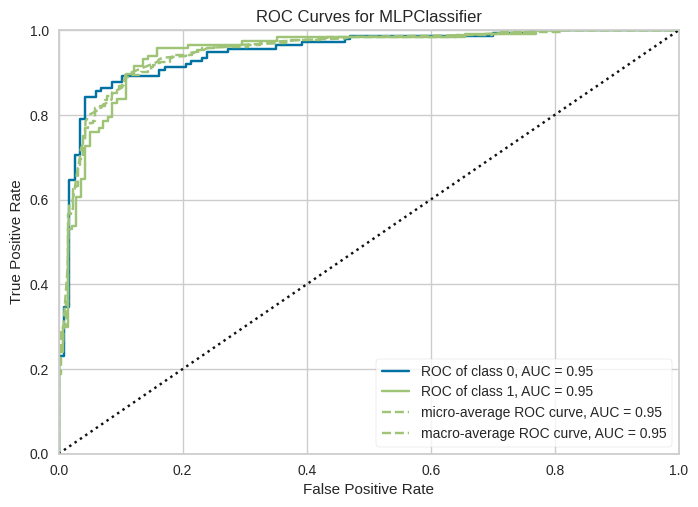

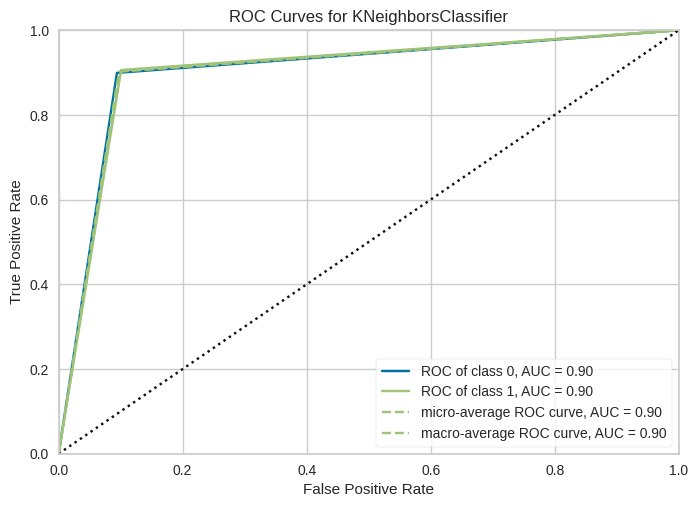

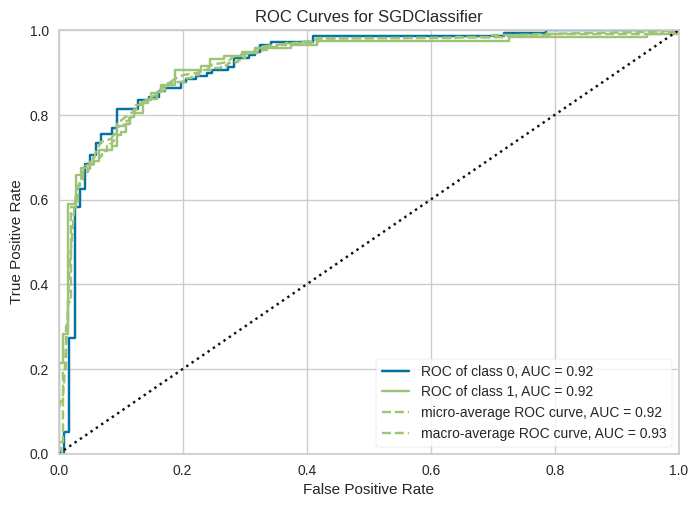

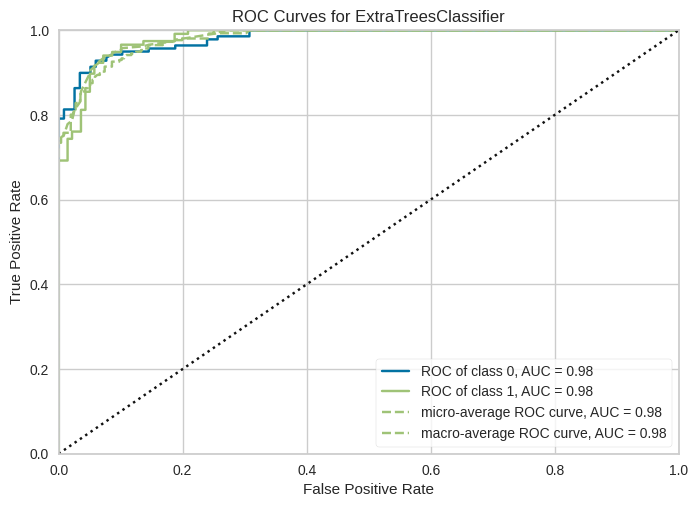

ModelError: ignored

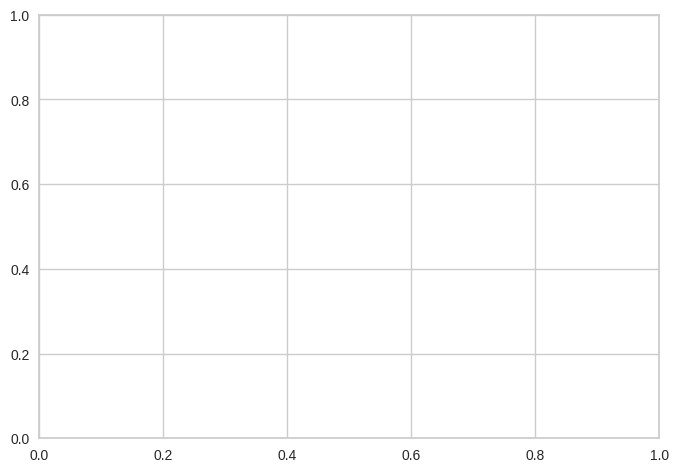

In [ ]:
visualization =[CR_viz(),CPE_viz(),CM_viz(),ROC_viz(),PRC_viz()]

In [ ]:
classifier_metrics()

DecisionTreeClassifier(max_depth=5, min_samples_split=5)
              precision    recall  f1-score   support

           1     0.9211    0.8974    0.9091       117
           2     0.0000    0.0000    0.0000         0
           3     0.0000    0.0000    0.0000         0

   micro avg     0.9211    0.8974    0.9091       117
   macro avg     0.3070    0.2991    0.3030       117
weighted avg     0.9211    0.8974    0.9091       117

accuracy_score: 0.9180

---------------------------------------------------------------------------------
MLPClassifier(hidden_layer_sizes=(100, 50))
              precision    recall  f1-score   support

           1     0.8974    0.8974    0.8974       117
           2     0.0000    0.0000    0.0000         0
           3     0.0000    0.0000    0.0000         0

   micro avg     0.8974    0.8974    0.8974       117
   macro avg     0.2991    0.2991    0.2991       117
weighted avg     0.8974    0.8974    0.8974       117

accuracy_score: 0.9062

-------

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# select classifiers
classifiers=[
DecisionTreeClassifier(criterion= 'gini',max_depth= 5, min_samples_leaf= 1, min_samples_split=5),
MLPClassifier(activation='relu', hidden_layer_sizes=(100, 50), learning_rate= 'constant', solver= 'adam'),
KNeighborsClassifier(algorithm='auto', leaf_size= 1, n_neighbors= 1, p= 1, weights= 'uniform'),
SGDClassifier(alpha=0.01, loss= 'log', max_iter=3000, penalty='l1'),
ExtraTreesClassifier(max_depth=20,n_estimators=200,min_samples_split=2, random_state=50),
svm.SVC(C=10, gamma= 'scale', kernel= 'rbf'),
RandomForestClassifier(max_depth= None, min_samples_split= 4, n_estimators=300, random_state=30),
GradientBoostingClassifier(learning_rate= 0.1, max_depth=7, n_estimators=200, random_state= 50),
]

names=['DT', 'MLP', 'KN','SGD','ET', 'SVC', 'RF','GB']


for i in range(len(classifiers)):
  print(names[i])
  kf = KFold(n_splits=10, shuffle=True, random_state=42)

  # Realiza la validación cruzada y obtén las puntuaciones de rendimiento
  puntuaciones = cross_val_score(classifiers[i], X_train, y_train, cv=kf)
  desviacion_estandar = np.std(puntuaciones)

  # Imprime las puntuaciones de rendimiento
  #print("Puntuaciones de rendimiento: ", puntuaciones)
  print("Puntuación media: ", np.mean(puntuaciones))
  print("Desviación estándar: ", desviacion_estandar)

DT
Puntuación media:  0.8807348181991245
Desviación estándar:  0.027602158349996898
MLP
Puntuación media:  0.8846659051970303
Desviación estándar:  0.031133833168081156
KN
Puntuación media:  0.8885113268608414
Desviación estándar:  0.03296691557608399
SGD
Puntuación media:  0.8592328193413289
Desviación estándar:  0.0186665146182916
ET
Puntuación media:  0.9091376356367791
Desviación estándar:  0.020274003944598603
SVC
Puntuación media:  0.8954311821816106
Desviación estándar:  0.0249790478153388
RF
Puntuación media:  0.8983247667999239
Desviación estándar:  0.024876140542498953
GB
Puntuación media:  0.9042451932229204
Desviación estándar:  0.023662293726739097
